In [1]:
import numpy as np
from enviroment import Env
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from util import getAction, monteCarlo, plotValueFunction
%matplotlib inline 

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def sarsaLambda(numOfEpisodes, N0, gamma, lbd, universalStateActionValues):
    stateActionValues = np.zeros([10, 21, 2])
    stateActionValuesCount = np.ones([10, 21, 2])
    mse = []
    for i in range(numOfEpisodes):
        game = Env()
        state = game.getCurrentState()
        eligibiltyTraces = np.zeros([10, 21, 2])
        action = getAction(state, N0, stateActionValues, stateActionValuesCount)
        while not game.isGameOver():
            stateActionValuesCount[state[0] - 1, state[1] - 1, action] += 1
            eligibiltyTraces[state[0] - 1, state[1] - 1, action] += 1
            newState, reward = game.step(state, action)
            currentStateActionValue = stateActionValues[state[0] - 1, state[1] - 1, action]
            if game.isGameOver():
                delta = reward - currentStateActionValue
                nextAction = 0
            else:
                nextAction = getAction(newState, N0, stateActionValues, stateActionValuesCount)
                newStateActionValues = stateActionValues[newState[0] - 1, newState[1] - 1, nextAction]
                delta = (reward + gamma * newStateActionValues) - currentStateActionValue
            alpha = 1.0 / stateActionValuesCount[state[0] - 1, state[1] - 1, action]
            stateActionValues += (alpha * delta * eligibiltyTraces)
            eligibiltyTraces += (gamma * lbd)
            state, action = newState, nextAction
        if (i % 1000 == 0):
            mse.append(np.sum((stateActionValues - universalStateActionValues)**2))
    return (stateActionValues, mse)

Value function when lambda =  0.0


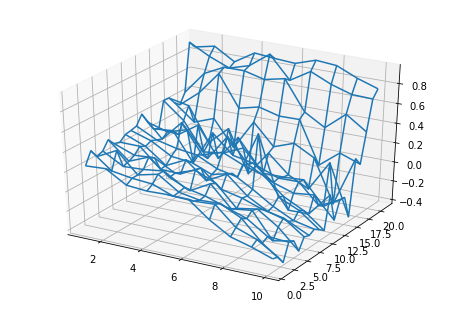

MSE plot when lambda =  0.0


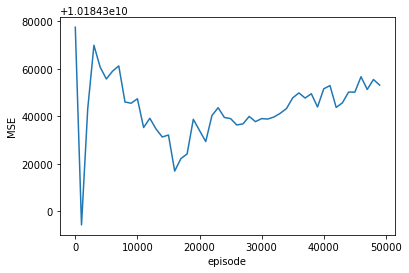

Value function when lambda =  0.1


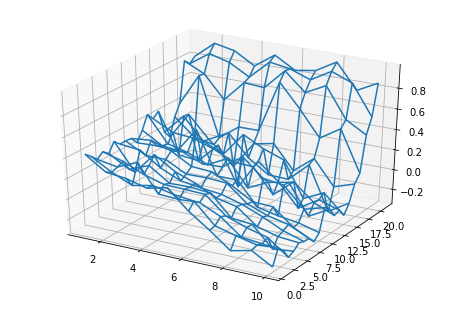

Value function when lambda =  0.2


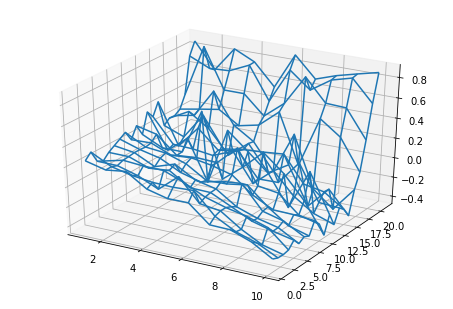

Value function when lambda =  0.3


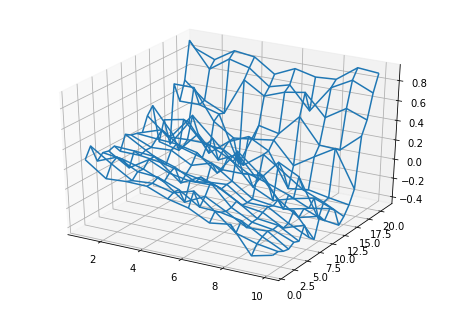

Value function when lambda =  0.4


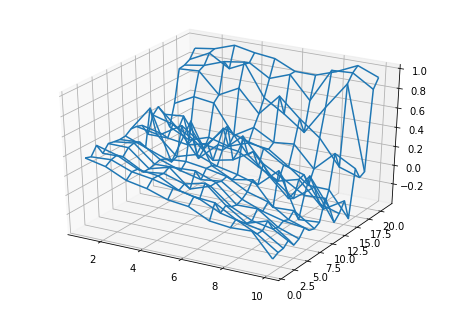

Value function when lambda =  0.5


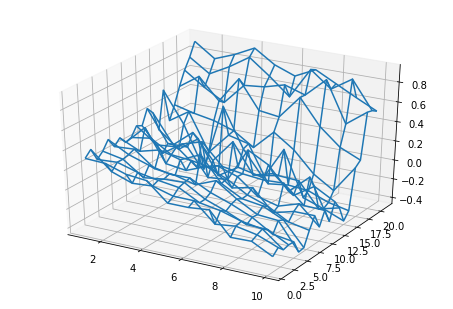

Value function when lambda =  0.6


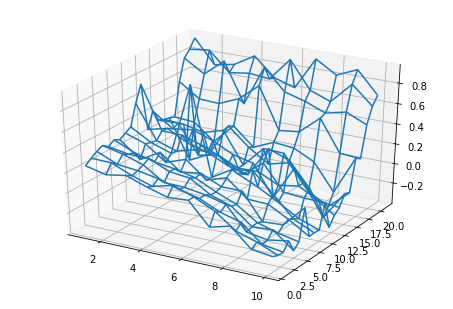

Value function when lambda =  0.7


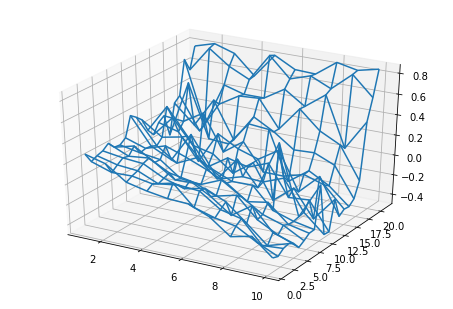

Value function when lambda =  0.8


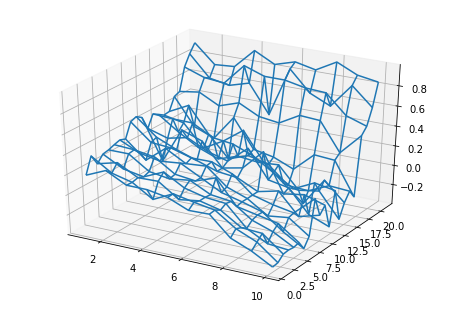

Value function when lambda =  0.9


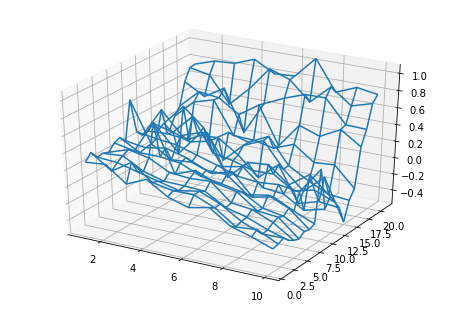

Value function when lambda =  1.0


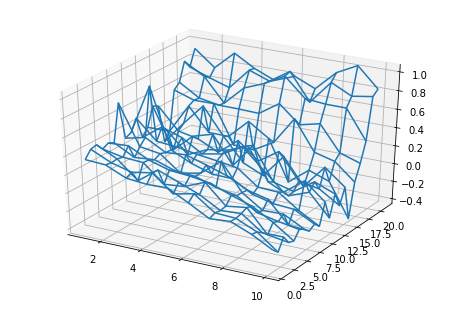

MSE plot when lambda =  1.0


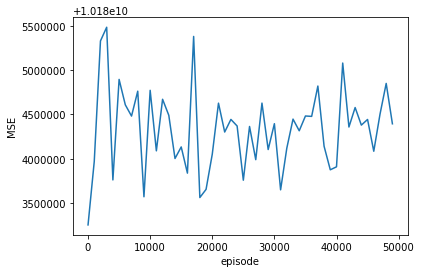

In [3]:
N0 = 150
gamma = 1
noOfEpisodes = 50000
mstList = []
universalQvalues = monteCarlo(1000000, N0)
for l in np.arange(0, 1.1, 0.1):
    sarsaQvalues, mse = sarsaLambda(noOfEpisodes, N0, gamma, l, universalQvalues)
    mstList.append(mse[-1])
    print("Value function when lambda = ", l)
    plotValueFunction(sarsaQvalues)
    if l == 0 or l == 1.0:
        print("MSE plot when lambda = ", l)
        plt.xlabel("episode")
        plt.ylabel("MSE")
        plt.plot(np.arange(0, noOfEpisodes, 1000), mse)
        plt.show()